<a href="https://colab.research.google.com/github/masrinez/masrinez/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Heart Failure Prediction

# **Table** **of** **content**


**Introduction**

**Data** **Wrangling**

**Exploratory** **Data** **Analysis**

**Conclusions**

 **Introduction**

**Dataset** **Description**

Rise in health-related issues has made it critical that everyone has easy access to health-care services. However,
 ***Cardiovascular*** **diseases** (e.g *Hypertension*, *Myocardial* *Infraction*, *Health* *failure*) are the number one cause of death in Nigeria and globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality rate by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

# Variables in this Dataset

1) Age: age of the patient [years]

2) Sex: sex of the patient [M: Male, F: Female]

3) ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

4) RestingBP: resting blood pressure [mm Hg]

5) Cholesterol: serum cholesterol [mm/dl]

6) FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

7) RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

8) MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]

9) ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

10) Oldpeak: oldpeak = ST [Numeric value measured in depression]

11) ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

12) HeartDisease: output class [1: heart disease, 0: Normal]

**Question**(**s**) **for** **Analysis**

So we will try answering the following questions below:

1) Predicting mortality caused by Heart Failure?

2) Is Cholesterol a major determinant in causing Heart Failure?

3) Is there any significant relationship between RestingECG and their elevated blood pressure?

4) Is there any significant relationship between Age and their elevated blood pressure?

5) Is there any significant relationship between fasting blood sugar and their elevated blood pressure?

# Acknowledgements

**Source**

This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations

Hungarian: 294 observations

Switzerland: 123 observations

Long Beach VA: 200 observations

Stalog (Heart) Data Set: 270 observations

Total: 1190 observations

Duplicated: 272 observations

Final dataset: 918 observations

Every dataset used can be found under the Index of heart disease datasets from UCI Machine Learning Repository on the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

 **Citation**

fedesoriano. (September 2021). Heart Failure Prediction Dataset. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/heart-failure-prediction.

**Creators**:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

**Donor**:

David W. Aha (aha '@' ics.uci.edu) (714) 856-8779

# **Data Wrangling**

In this section of the report, we are going to perform the following tasks:

1) load in the data.

2) check for cleanliness and orderliness.

3) trim the dataset.

4) clean the dataset for analysis. 


 **Data Gathering**

In [1]:
# import statements for all packages 

# For Data analysis

import pandas as pd
import numpy as np


In [2]:
# For data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#For unzipping files

import zipfile

In [4]:
# Upgrade pandas to use dataframe.explode() function. 

!pip install --upgrade pandas==1.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
#Extract all content from zip file

with zipfile.ZipFile('archive (2).zip', 'r') as myzip:
  myzip.extractall()

**Data** **Assessing**

**General** **Properties**

*I am going to avoid performing too many operations in each cell. I am going to Create cells freely to explore my data.*

In [6]:
# Loading my data 

df = pd.read_csv('heart.csv')

#Performing operations to inspect few columns in the dataset

df.head(2)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [10]:
#Checking the last 5 records in the dataset

df.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
#getting information on the characteristices of each attributes in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [11]:
#checking the size of the dataset
df.shape

(918, 12)

 **The Dataset I am working on possess:**

1) 299 records/rows

2) 13 Fields/Column 

In [9]:
# Checking the statistical values of the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [12]:
# Checking Columns for missing value

df.isnull().sum().any()

False

In [13]:
# Checking columns for missing value

df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [23]:
#To get a list of missing value

df.columns[df.isnull().any()].tolist()

[]

In [14]:
# Checking row for missing value

df.isnull().any(axis = 1).sum()

0

In [15]:
#Checking row for missing value

df.isnull().any(axis = 1)

0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Length: 918, dtype: bool

In [16]:
#Checking number of unique characters

df.nunique().sum()

529

In [17]:
#number of duplicates

df.duplicated().sum()

0

In [21]:
#Data type of the dataset

df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [18]:
#Number of unique values for each columns
df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
28   M    ATA            130        132          0          LVH         185    N               0.0      Up        0               1
58   M    ASY            128        216          0          LVH         131    Y               2.2      Flat      1               1
                         130        0            0          ST          100    Y               1.0      Flat      1               1
                                    263          0          Normal      140    Y               2.0      Flat      1               1
                         132        458          1          Normal      69     N               1.0      Down      0               1
                                                                                                                                 ..
50   M    ASY            150        215          0          Normal      140    Y 

In [20]:
#Number of unique value for cholesterol.
df.Cholesterol.value_counts()

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

**I have gone through the entire dataset to check for the number of columns, number of rows, presence of duplicated value, presence of missing values, the statistical figure of the dataset and the number of Unique characters.**

No missing column and rows

No missing data

No duplicates

No mismatch number of records

No structural problems such as different column names


# **Data Cleaning**

**I am going to keep you informed on the steps taken in my investigation. Following every code cell, or every set of related code cells, with a markdown cell to describe what was found in the preceding cell(s).**

 **Prepaing the data and identifying irregularities**

In [31]:
#Copying the dataset into pandas.copy

df_cln = df.copy()



In [33]:
# Checking the data type of each attributes and making sure they are in the right format needed for analysis

df_cln.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [34]:
#Checking the first 3 records

df_cln.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0


In [35]:
#Checking the unique value for chest pain type

df_cln.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [36]:
#Checking the unique value for St_slope

df_cln.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [37]:
#Checking the unique value for Resting ECG

df_cln.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [38]:
#Checking the unique value for exercise angina

df_cln.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [39]:
#Checking the information of the data set

df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [40]:
#Rechecking the statistical properties of all the numeric variables

df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Evaluating the dataset using the descriptive statistical value shows that the old peak variable possess a minimum value of -2.6 which is an unusual figure.

I am going to drop the roll that possess the unusual negative value in the old peak variable.

Every other columns looks okay

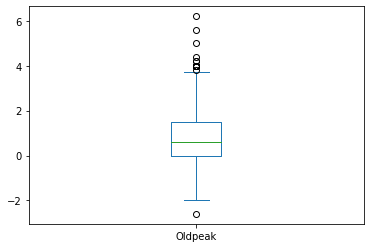

In [42]:
df['Oldpeak'].plot(kind = 'box');

6.2 is the maximum number of the old peak variable according to the box plot and that seems like a realistic number.

Implementing a function statement to rectify the discrepancy



In [43]:
def outlier (df_cln, Oldpeak):

  q1 = df['Oldpeak'].quantile(0.25)

  q3 = df['Oldpeak'].quantile(0.75)

  qr = q3 - q1

  df_cln = df_cln.loc[~((df_cln['Oldpeak'] < (q1 -1.5 * qr))| (df_cln['Oldpeak'] < (q3 +1.5 * qr))),]

  return df_cln

outlier(df_cln, 'Oldpeak')  

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
68,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
500,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
521,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
537,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
559,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1
624,63,F,ASY,150,407,0,LVH,154,N,4.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1


In [45]:
# Query the Old post variable

df_cln.query('Oldpeak == -2.6')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
324,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1


In [46]:
# Dropping the above variable

df_cln.drop(df_cln.query('Oldpeak == -2.6').index, inplace = True)

In [47]:
#Checking to confirm the negative value for Old peak isn't in our data set

df_cln.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.519084,132.431843,199.016358,0.232279,136.813522,0.891167,0.552890
std,9.434497,18.493271,109.246330,0.422517,25.473917,1.060906,0.497466
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.000000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000
